# Machine Learning topological phases in real space: Nearest-neighbours SSH model 6561_110 periodic boundary conditions.

In this notebook we produce the results of the machine learning analysis of topological phase transitions occurring  in nearest-neighbours SSH models as decribed in the paper [Machine learning topological phases in real space](https://arxiv.org/abs/1901.01963).

## Running models with SSH data

In [1]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

CPU times: user 397 ms, sys: 48 ms, total: 445 ms
Wall time: 453 ms


In [2]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_110.csv"             
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_110"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None 
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443420 entries, 0 to 1443419
Columns: 228 entries, id to feat219
dtypes: float64(223), int32(3), object(2)
memory usage: 2.4+ GB
CPU times: user 32.3 s, sys: 2.44 s, total: 34.8 s
Wall time: 33.4 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.067420,0.067420,...,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.095346,0.095307,...,0.091484,0.090680,0.092868,0.092214,0.093950,0.093447,0.094725,0.094376,0.095191,0.094997
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.095346,0.095191,...,0.080210,0.077137,0.085564,0.083022,0.089801,0.087826,0.092868,0.091484,0.094725,0.093950
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.067420,-0.067420,...,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.095346,-0.095307,...,0.091484,-0.090680,0.092868,-0.092214,0.093950,-0.093447,0.094725,-0.094376,0.095191,-0.094997


#### Checking initialization

In [3]:
%%time
n_features = simulation.n_features
n_hamiltonians = simulation.n_hamiltonians
n_ts = simulation.n_ts

print("n_features: ", n_features)
print("n_hamiltonians: ", n_hamiltonians)
print("n_ts: ", n_ts)

n_features:  220
n_hamiltonians:  6561
n_ts:  2
CPU times: user 639 µs, sys: 15 µs, total: 654 µs
Wall time: 439 µs


In [4]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.8306660570035056
% val:  0.0
% test:  0.16933394299649443
% train + val + test:  1.0


number of train hamiltonians:  5450
number of val hamiltonians:  0
number of test hamiltonians:  1111
total number of hamiltonians:  6561


train ids:  [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,

## Running a simulation

In [5]:
%%time
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False   
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments = n_experiments, start_n = start_n, fit_params = fit_params, \
                          pred_params=pred_params, random_features = random_features, \
                          store_in_lists=store_in_lists, save_eigenvector=save_eigenvector, \
                          save_hamiltonian=save_hamiltonian, save_accuracy=save_accuracy, save_model=save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [1:12:08<00:00, 41.12s/it]

CPU times: user 1h 15min 42s, sys: 1min 3s, total: 1h 16min 46s
Wall time: 1h 12min 8s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.067420,0.067420,...,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.095346,0.095307,...,0.091484,0.090680,0.092868,0.092214,0.093950,0.093447,0.094725,0.094376,0.095191,0.094997
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.095346,0.095191,...,0.080210,0.077137,0.085564,0.083022,0.089801,0.087826,0.092868,0.091484,0.094725,0.093950
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.067420,-0.067420,...,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.095346,-0.095307,...,0.091484,-0.090680,0.092868,-0.092214,0.093950,-0.093447,0.094725,-0.094376,0.095191,-0.094997
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.095346,-0.095191,...,0.080210,-0.077137,0.085564,-0.083022,0.089801,-0.087826,0.092868,-0.091484,0.094725,-0.093950
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.095346,0.085564,...,0.013569,0.029464,0.083022,-0.053818,0.087826,-0.095191,0.024239,-0.062439,-0.058223,0.018935
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.000142,-0.002581,...,0.026726,-0.029329,0.021458,-0.024102,0.016119,-0.018796,0.010728,-0.013429,0.005302,-0.008018
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.000068,-0.005375,...,0.051491,-0.055988,0.042008,-0.046825,0.031977,-0.037053,0.021529,-0.026797,0.010801,-0.016191
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.095346,0.094725,...,-0.039608,0.029463,-0.058223,0.049236,-0.073811,0.066450,-0.085563,0.080210,-0.092868,0.089801


#### Viewing a random sample

In [6]:
%%time
simulation.dataframe.sample(frac=0.1, replace=False)

CPU times: user 203 ms, sys: 41 µs, total: 203 ms
Wall time: 202 ms


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat170,feat171,feat172,feat173,feat174,feat175,feat176,feat177,feat178,feat179
431345,2396,H_-0.55_0.35_0.000421786.dat,-0.55,0.35,0.000422,0,0,val,0.000019,-0.038242,...,0.103804,-0.090095,-0.073237,0.095744,-0.021897,-0.016983,0.097726,-0.076749,-0.087399,0.102819
812811,4515,H_0.75_1_1.00434.dat,0.75,1.00,1.004338,1,1,test,0.001088,-0.092872,...,-0.037073,0.070218,-0.086775,-0.093268,0.079058,-0.025091,0.048523,0.105408,-0.102536,-0.025910
277239,1540,H_-1.05_-1.95_1.00235.dat,-1.05,-1.95,1.002350,1,1,val,0.105404,-0.101203,...,-0.053645,0.076132,-0.012101,0.039897,0.031536,-0.003236,0.069719,-0.045810,0.095848,-0.080463
405338,2251,H_-0.65_1.2_1.0007.dat,-0.65,1.20,1.000704,1,1,train,-0.000376,-0.104912,...,-0.103742,0.028292,-0.049154,0.097434,0.043217,0.091681,0.102369,0.015455,0.082831,-0.072651
793821,4410,H_0.7_-0.2_0.000241021.dat,0.70,-0.20,0.000241,0,0,val,-0.105404,-0.104389,...,-0.099418,-0.093089,0.098676,0.103098,-0.051762,-0.064865,-0.019372,-0.003718,0.081442,0.070562
972332,5401,H_1.3_0.75_-0.001479.dat,1.30,0.75,-0.001479,0,0,val,0.003308,-0.053816,...,0.070257,-0.099486,-0.098925,0.104196,0.104434,-0.084514,-0.085495,0.045047,0.046541,0.004966
23977,133,H_-1.95_0.6_0.000255198.dat,-1.95,0.60,0.000255,0,0,val,0.000127,0.010122,...,0.091350,-0.085804,-0.104845,0.103289,0.100211,-0.102915,-0.078249,0.084746,0.042758,-0.051923
68649,381,H_-1.8_0.85_0.000347888.dat,-1.80,0.85,0.000348,0,0,val,0.105409,0.098709,...,-0.099136,-0.105405,0.003923,0.040405,0.096197,0.075133,-0.075994,-0.096695,-0.039261,-0.002687
108100,600,H_-1.65_-0.35_-0.000292006.dat,-1.65,-0.35,-0.000292,0,0,val,0.105408,0.105399,...,-0.098870,-0.099539,0.101179,0.101716,-0.102995,-0.103397,0.104308,0.104575,-0.105114,-0.105244
516577,2869,H_-0.25_-0.3_1.00651.dat,-0.25,-0.30,1.006508,1,0,test,0.105408,0.016610,...,0.081046,0.079633,-0.105119,-0.009308,0.070186,-0.066241,0.004144,0.104609,-0.076148,-0.084257


#### Checking train/val/test splits again

In [7]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.08306660570035056
% val:  0.747599451303155
% test:  0.16933394299649443
% train + val + test:  1.0


number of train hamiltonians:  545
number of val hamiltonians:  4905
number of test hamiltonians:  1111
total number of hamiltonians:  6561


train ids:  [2244, 5598, 2661, 4558, 665, 1326, 3471, 1851, 3143, 683, 5204, 5638, 1215, 3375, 2247, 1847, 6433, 2493, 3434, 3988, 2105, 5365, 3017, 4520, 749, 2842, 56, 2116, 4832, 3821, 345, 1591, 669, 3060, 113, 4161, 2766, 4045, 4392, 1609, 1769, 2366, 5720, 3276, 1926, 6425, 3581, 1622, 1127, 1892, 4009, 5508, 6401, 2166, 4852, 1490, 104, 6044, 2545, 1830, 16, 3357, 4939, 4038, 2576, 1509, 2004, 607, 3199, 1709, 3974, 2678, 4212, 6490, 1697, 963, 4865, 6268, 6410, 4857, 3027, 1255, 1420, 5308, 2942, 1367, 4690, 3549, 5929, 5295, 778, 5856, 2063, 5957, 1261, 753, 2799, 4797, 2352, 2257, 2405, 3255, 1047, 1974, 4783, 3419, 6382, 4003, 2316, 4168, 204, 5372, 3894, 1611, 1194, 3439, 5617, 5776, 3649, 3825, 393, 5298, 5069, 4948, 4580

#### Checking summaries

In [8]:
%%time
ham_summary = simulation.hamiltonian_summary
print("length of ham_summary: ", len(ham_summary))
ham_summary

length of ham_summary:  6561
CPU times: user 179 µs, sys: 2 µs, total: 181 µs
Wall time: 113 µs


,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.594444,0.405556,999,0
1,-2.0,-1.95,test,0.650000,0.350000,0,0
2,-2.0,-1.90,test,0.694444,0.305556,0,0
3,-2.0,-1.85,test,0.794444,0.205556,0,0
4,-2.0,-1.80,test,0.794444,0.205556,0,0
5,-2.0,-1.75,test,0.844444,0.155556,0,0
6,-2.0,-1.70,test,0.822222,0.177778,0,0
7,-2.0,-1.65,test,0.900000,0.100000,0,0
8,-2.0,-1.60,test,0.905556,0.094444,0,0


In [9]:
eigen_summary = simulation.eigenvector_summary
print("length of ham_summary: ", len(eigen_summary))
eigen_summary

length of ham_summary:  1180980


,id,phase,pred_phase,type_of
0,0,999,1,test
1,0,999,0,test
2,0,999,0,test
3,0,999,1,test
4,0,999,0,test
5,0,999,0,test
6,0,999,1,test
7,0,999,1,test
8,0,999,1,test
9,0,999,0,test


#### Checking accuracies

In [10]:
simulation.accuracy

{'eigenvector_train': 0.989704383282365,
 'eigenvector_val': 0.9718575150073621,
 'eigenvector_test': 0.7970233918128655,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9842105263157894}

#### Checking data stored in  memory

In [11]:
ham_summary_list = simulation.hamiltonian_summary_list
ham_summary_list

[]

In [12]:
eigen_summary_list = simulation.eigenvector_summary_list
eigen_summary_list

[]

In [13]:
accuracy_list = simulation.accuracy_list
accuracy_list

{'eigenvector_train': [],
 'eigenvector_val': [],
 'eigenvector_test': [],
 'hamiltonian_train': [],
 'hamiltonian_val': [],
 'hamiltonian_test': []}

#### Visualizing train/val/test splits

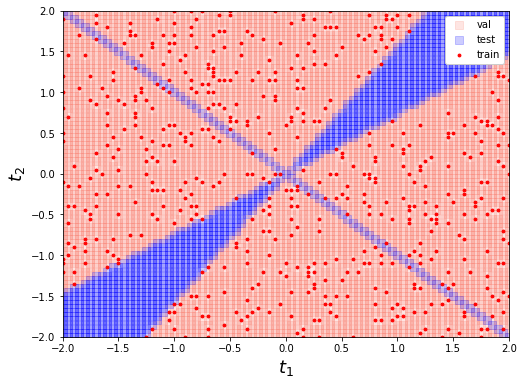

In [14]:
fig_params={"figsize": (8,6)} 
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
train_params={"marker": "o", "s": 8, "color": "red", "label": "train"}
legend_params={"framealpha": 1}
xlabel_params={"xlabel": "$t_1$", "fontsize": 18}
ylabel_params={"ylabel": "$t_2$", "fontsize": 18}
title_params={}
savefig_params = {}
simulation.visualize_scatter_2d(fig_params = fig_params, val_params = val_params, test_params = test_params,\
                                train_params = train_params, legend_params = legend_params, \
                                xlabel_params = xlabel_params, ylabel_params = ylabel_params, title_params = title_params,\
                               savefig_params = savefig_params)

# Analyzing simulation data

In [2]:
%load_ext autoreload
%autoreload 2
from data_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Testing Experiment class

In [3]:
#simulation_dir = "./simulation/fig1b-6561-100"
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_110"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Viewing Train/Val/Test split

In [4]:
experiment.print_train_val_test()

% train:  0.08306660570035056
% val:  0.747599451303155
% test:  0.16933394299649443
% train + val + test:  1.0


number of train hamiltonians:  545
number of val hamiltonians:  4905
number of test hamiltonians:  1111
total number of hamiltonians:  6561


#### Viewing dataset summary

In [5]:
experiment.print_phases()

Summary of train + val data

% train/val phases: 
0    0.514495
1    0.485505
Name: phase, dtype: float64


total train/val phases: 
0    2804
1    2646
Name: phase, dtype: int64


Summary of test data

% test phases: 
1    0.583158
0    0.416842
Name: phase, dtype: float64


total test phases: 
1    554
0    396
Name: phase, dtype: int64


Summary of train + val + test data

% phases: 
1    0.5
0    0.5
Name: phase, dtype: float64


total phases: 
1    3200
0    3200
Name: phase, dtype: int64


#### Viewing eigenvector summary

In [6]:
experiment.eigenvector_summary.head()

,id,phase,pred_phase,type_of
0,0,999,1,test
1,0,999,0,test
2,0,999,0,test
3,0,999,0,test
4,0,999,0,test


#### Viewing Hamiltonian summary

In [7]:
experiment.hamiltonian_summary.head()

,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.559091,0.440909,999,0
1,-2.0,-1.95,test,0.654545,0.345455,0,0
2,-2.0,-1.90,test,0.750000,0.250000,0,0
3,-2.0,-1.85,test,0.790909,0.209091,0,0
4,-2.0,-1.80,test,0.877273,0.122727,0,0


#### Viewing accuracy

In [8]:
experiment.accuracy

{'eigenvector_train': 0.9913594662218516,
 'eigenvector_val': 0.9761597627652674,
 'eigenvector_test': 0.8378995215311005,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 1.0}

#### Visualizing train/val/test splits with scatter plot

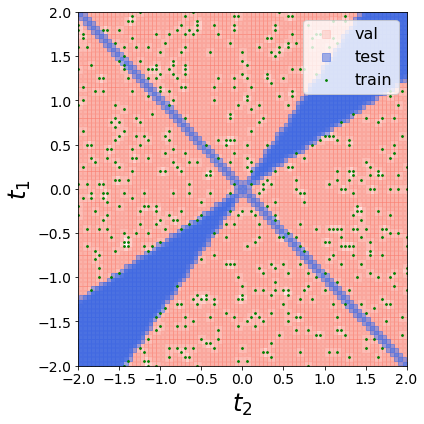

In [9]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
#val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
#test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
#train_params={"marker": "o", "s": 10, "color": "red", "label": "train"}
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.5, "color": "royalblue", "label": "test"}
train_params={"marker": "o", "s": 3, "alpha": 1, "color": "green", "label": "train"}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
#savefig_params = {"fname": os.path.join(experiment.simulation_dir, "fig1a-6561_train_val_test_0.png")}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_110_train_val_test_split_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_train_val_test(val_params, test_params, train_params, legend_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params,\
                                 tight_params, savefig_params)

#### Plotting train winding labels with scatter plot

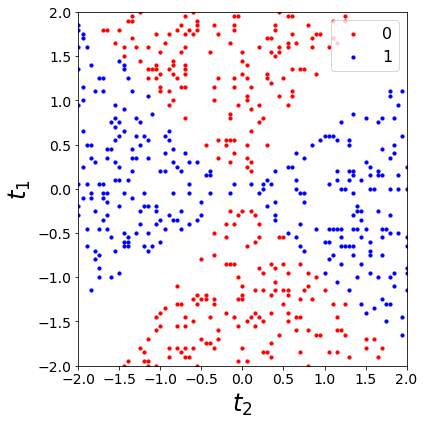

In [10]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}, \
                  }
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_110_train_winding_labels_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_winding_train(winding_params, legend_params, fig_params, xlabel_params, ylabel_params, \
                                 title_params,  xlim_params, ylim_params, xticks_params, yticks_params, \
                                 tight_params, savefig_params)

#### Plotting prediction grid with pcolormesh

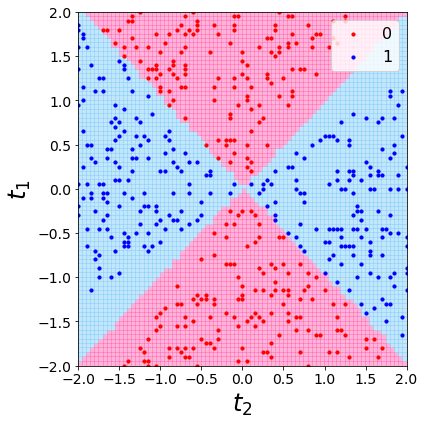

In [11]:
#fig_params, winding_params, contourf_params, legend_params, xlabel_params, ylabel_params, title_params, savefig_params)
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)}
#winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
#                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
#                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
#                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, 
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}}

#pcolormesh_params = {"cmap": ListedColormap(["hotpink", "orange", "lightgreen","lightskyblue"]), "alpha": 0.5}
pcolormesh_params = {"cmap": ListedColormap(["hotpink", "lightskyblue"]), "alpha": 0.5}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_110_prediction_grid_experiment_0.png"
savefig_params = {"fname": os.path.join(experiment.simulation_dir, path_to_save)}
experiment.pcolormesh_prediction_grid(winding_params, pcolormesh_params, legend_params, fig_params, xlabel_params, \
                                ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                                      tight_params,  savefig_params)

#### Plotting Winding Heatmaps

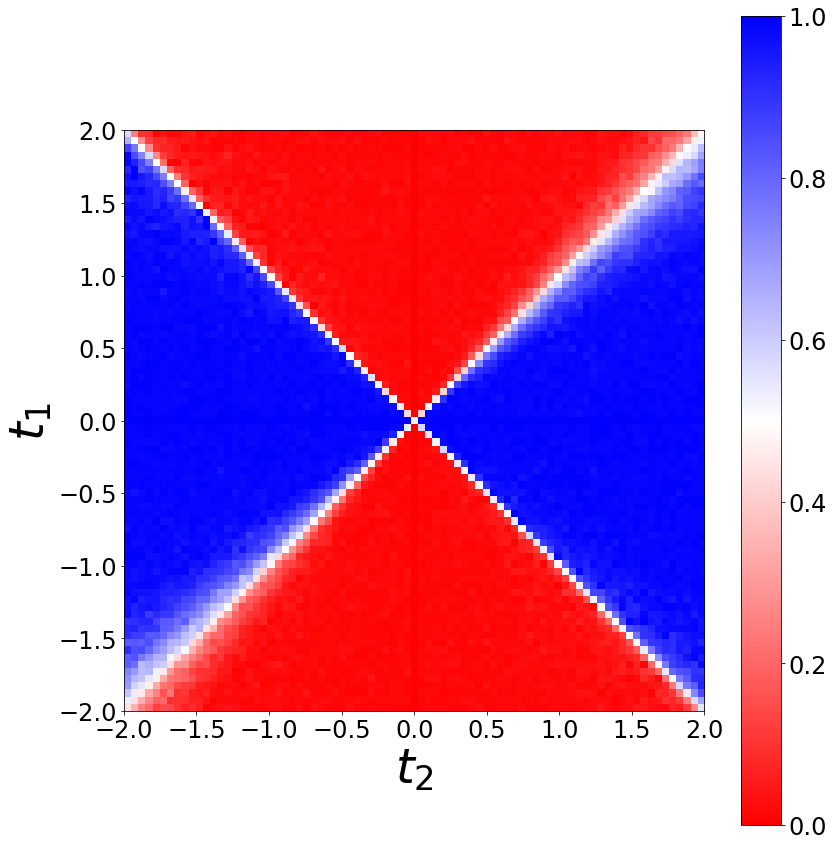

In [12]:
winding = 1
imshow_params = {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2],\
                "vmin": 0, "vmax":1}
colorbar_params={"mappable": None, "labelsize": 24}
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = False
savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

## Testing ExperimentEnsemble Class

In [13]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_110"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [18]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 127160.03it/s]


#### Plotting simulation winding heatmaps

Skipping winding 0
Plotting winding 1


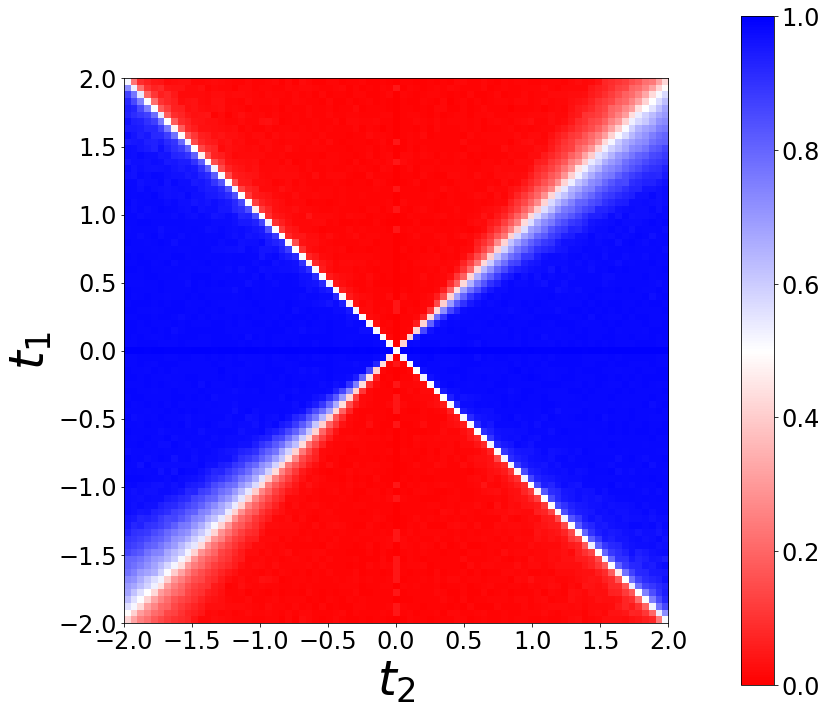

In [19]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_110_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

#### Computing mean accuracies

In [20]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk=save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:31<00:00,  3.09it/s]


{'eigenvector_train': 0.9916197664720601,
 'eigenvector_val': 0.9757380780279863,
 'eigenvector_test': 0.8064265071770335,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9999857288481141,
 'hamiltonian_test': 0.9819789473684211}

#### Computing bootstrap accuracies

In [21]:
save_to_disk = True
simulation.compute_bootstrap_accuracy(save_to_disk=save_to_disk)
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.9978947368421053}

#### Computing mean feature importances

In [22]:
import operator
save_to_disk = False
simulation.compute_mean_feature_importance(save_to_disk=save_to_disk)
### Sorted feature importances from highest to lowest
sorted_feature_importances = sorted(simulation.feature_importance.items(), key=operator.itemgetter(1),reverse=True)
print("Sorted feature importances: ", sorted_feature_importances)

mean feature importances: 100%|██████████| 100/100 [00:00<00:00, 1853.80it/s]

Sorted feature importances:  [(111, 0.14319140847954803), (1, 0.13652997294105748), (3, 0.1358670258652416), (113, 0.12990435229389447), (0, 0.10314375871053917), (110, 0.09403933493557101), (219, 0.02363592613553351), (109, 0.022899476065276567), (5, 0.012484644943891484), (115, 0.011940729827073395), (7, 0.007075435692316089), (117, 0.006418762560890441), (2, 0.005708445914542539), (218, 0.005032931463240198), (112, 0.004337866447323093), (4, 0.00385333141629595), (215, 0.003766803502565795), (108, 0.003647209112271701), (105, 0.003235247594229571), (107, 0.0027471496582663264), (114, 0.002489121676987558), (216, 0.0024549785879099907), (217, 0.0023499369689625516), (75, 0.0022501537489133245), (39, 0.0022493912264669406), (149, 0.002201872451458242), (11, 0.002105831311564036), (119, 0.0018725993188080244), (106, 0.0017709792281314306), (185, 0.0017330309386022174), (57, 0.0016071720547466647), (9, 0.0015789564520710794), (167, 0.0014689733418070672), (77, 0.0014084207891262258), (1

#### Plotting feature importances

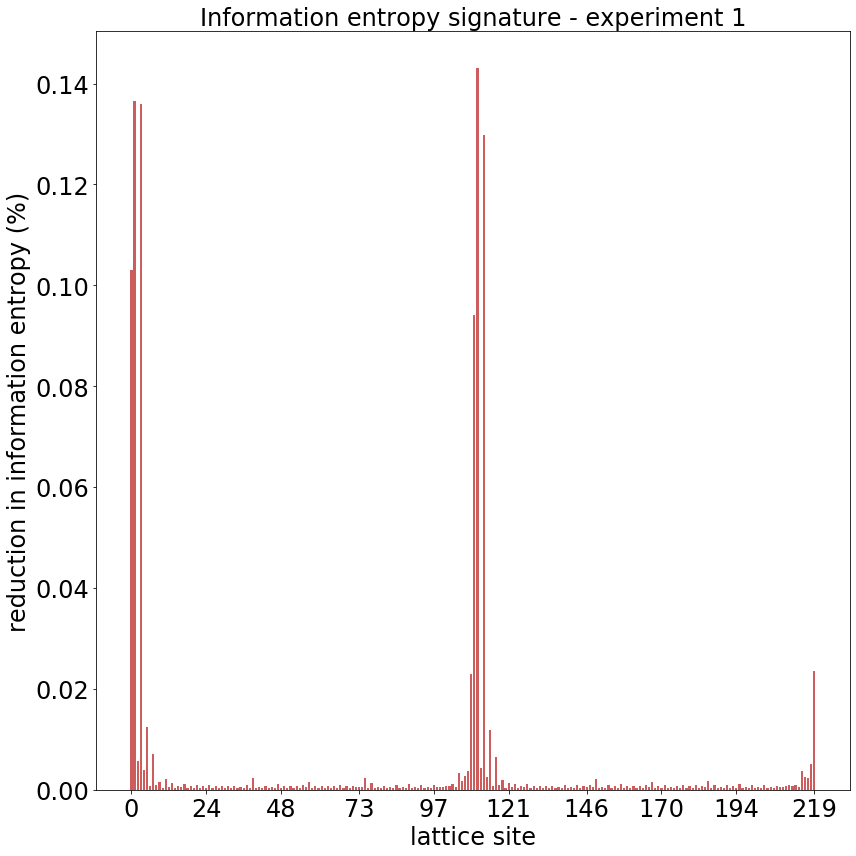

In [24]:
#plot_feature_importances(self, n_features=None, fig_params={}, xlabel_params={}, ylabel_params={}, title_params={})
n_features = None
plot_type = "bar"
plot_params = {"color": "indianred", "width": 0.7}
#plot_params=None
#hist_params = {"color": "tomato", "width": 0.7}
#hist_params = None
hist_precision = 1000
fig_params={"figsize": (12,12)} 
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
xlim_params = {}
ylim_params = {}
xticks_params = {"ticks": np.linspace(0,219,10).astype(int), "fontsize": 24}
#xticks_params = {}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_110_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)

#### Plotting cumulative feature importances

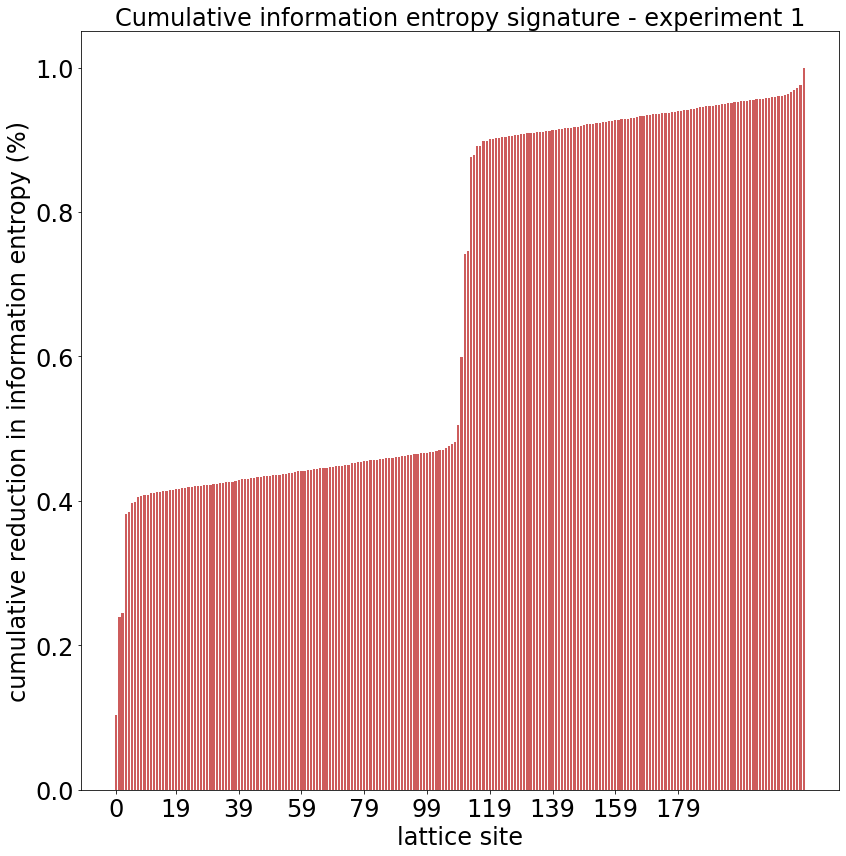

In [25]:
n_features = None
plot_type = "bar"
hist_precision = 1000
plot_params = {"color":"indianred", "width": 0.7}
fig_params={"figsize": (12,12)}
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "cumulative reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Cumulative information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
#xlim_params = {"left":-1, "right":100}
xlim_params = {}
ylim_params = {}
#xticks_params = {"ticks": np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,16).astype(int)] }
xticks_params = {"ticks": np.linspace(0,219,10).astype(int), "fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_110_cumulative_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_cumulative_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)


# Running simulation with most relevant features 111,1

We now rerun the simulations using the most relevant features only

In [36]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 323 µs, sys: 21 µs, total: 344 µs
Wall time: 270 µs


In [28]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path =  "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_110.csv"             
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_110_feat_111_1"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [111,1]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443420 entries, 0 to 1443419
Columns: 228 entries, id to feat219
dtypes: float64(223), int32(3), object(2)
memory usage: 2.4+ GB
CPU times: user 32.9 s, sys: 2.49 s, total: 35.4 s
Wall time: 33.7 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.067420,0.067420,...,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.095346,0.095307,...,0.091484,0.090680,0.092868,0.092214,0.093950,0.093447,0.094725,0.094376,0.095191,0.094997
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.095346,0.095191,...,0.080210,0.077137,0.085564,0.083022,0.089801,0.087826,0.092868,0.091484,0.094725,0.093950
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.067420,-0.067420,...,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.095346,-0.095307,...,0.091484,-0.090680,0.092868,-0.092214,0.093950,-0.093447,0.094725,-0.094376,0.095191,-0.094997


### Running simulation

In [29]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [11:02<00:00,  6.34s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.067420,0.067420,...,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.095346,0.095307,...,0.091484,0.090680,0.092868,0.092214,0.093950,0.093447,0.094725,0.094376,0.095191,0.094997
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.095346,0.095191,...,0.080210,0.077137,0.085564,0.083022,0.089801,0.087826,0.092868,0.091484,0.094725,0.093950
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.067420,-0.067420,...,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.095346,-0.095307,...,0.091484,-0.090680,0.092868,-0.092214,0.093950,-0.093447,0.094725,-0.094376,0.095191,-0.094997
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.095346,-0.095191,...,0.080210,-0.077137,0.085564,-0.083022,0.089801,-0.087826,0.092868,-0.091484,0.094725,-0.093950
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.095346,0.085564,...,0.013569,0.029464,0.083022,-0.053818,0.087826,-0.095191,0.024239,-0.062439,-0.058223,0.018935
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.000142,-0.002581,...,0.026726,-0.029329,0.021458,-0.024102,0.016119,-0.018796,0.010728,-0.013429,0.005302,-0.008018
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.000068,-0.005375,...,0.051491,-0.055988,0.042008,-0.046825,0.031977,-0.037053,0.021529,-0.026797,0.010801,-0.016191
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.095346,0.094725,...,-0.039608,0.029463,-0.058223,0.049236,-0.073811,0.066450,-0.085563,0.080210,-0.092868,0.089801


#### Loading simulation

In [30]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_110_feat_111_1"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Computing Hamiltonian summary

In [31]:
simulation.n_experiments

100

In [32]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 112586.90it/s]


#### Computing mean accuracies with less features

In [33]:
simulation.n_experiments

100

In [34]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:35<00:00,  3.24it/s]


{'eigenvector_train': 0.8947025020850706,
 'eigenvector_val': 0.5661308868501529,
 'eigenvector_test': 0.4790228229665071,
 'hamiltonian_train': 0.9876513761467891,
 'hamiltonian_val': 0.6121345565749235,
 'hamiltonian_test': 0.29407368421052626}

#### Plotting heatmap for less features

Skipping winding 0
Plotting winding 1


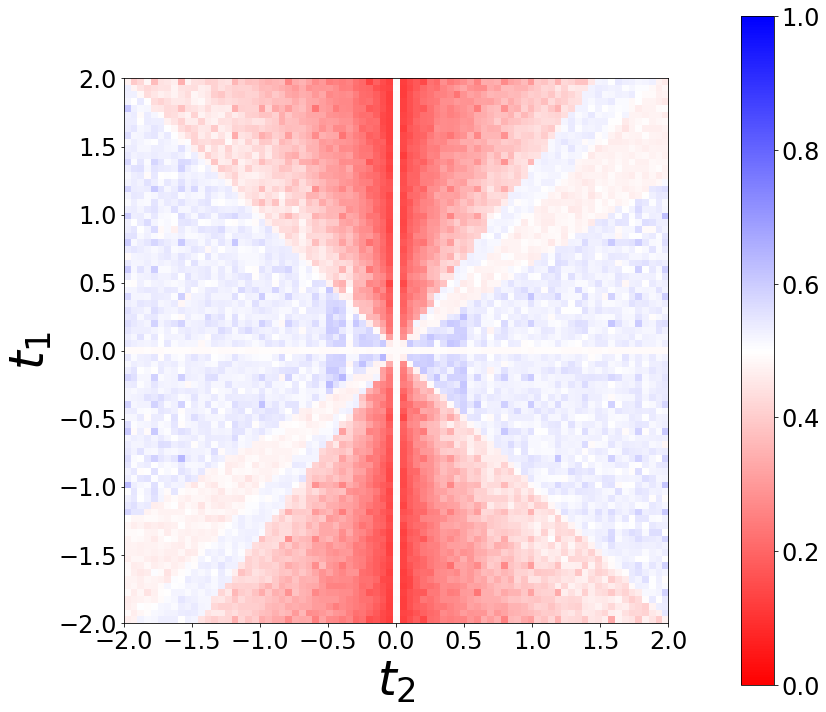

In [35]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_110_feat_111_1_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with most relevant features 111,3

In [39]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path =  "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_110.csv"             
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_110_feat_111_3"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [111,3]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443420 entries, 0 to 1443419
Columns: 228 entries, id to feat219
dtypes: float64(223), int32(3), object(2)
memory usage: 2.4+ GB
CPU times: user 33 s, sys: 2.44 s, total: 35.4 s
Wall time: 34.4 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.067420,0.067420,...,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.095346,0.095307,...,0.091484,0.090680,0.092868,0.092214,0.093950,0.093447,0.094725,0.094376,0.095191,0.094997
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.095346,0.095191,...,0.080210,0.077137,0.085564,0.083022,0.089801,0.087826,0.092868,0.091484,0.094725,0.093950
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.067420,-0.067420,...,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.095346,-0.095307,...,0.091484,-0.090680,0.092868,-0.092214,0.093950,-0.093447,0.094725,-0.094376,0.095191,-0.094997


In [40]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)


running experiments: 100%|██████████| 100/100 [10:32<00:00,  6.17s/it]

,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.067420,0.067420,...,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.095346,0.095307,...,0.091484,0.090680,0.092868,0.092214,0.093950,0.093447,0.094725,0.094376,0.095191,0.094997
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.095346,0.095191,...,0.080210,0.077137,0.085564,0.083022,0.089801,0.087826,0.092868,0.091484,0.094725,0.093950
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.067420,-0.067420,...,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.095346,-0.095307,...,0.091484,-0.090680,0.092868,-0.092214,0.093950,-0.093447,0.094725,-0.094376,0.095191,-0.094997
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.095346,-0.095191,...,0.080210,-0.077137,0.085564,-0.083022,0.089801,-0.087826,0.092868,-0.091484,0.094725,-0.093950
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.095346,0.085564,...,0.013569,0.029464,0.083022,-0.053818,0.087826,-0.095191,0.024239,-0.062439,-0.058223,0.018935
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.000142,-0.002581,...,0.026726,-0.029329,0.021458,-0.024102,0.016119,-0.018796,0.010728,-0.013429,0.005302,-0.008018
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.000068,-0.005375,...,0.051491,-0.055988,0.042008,-0.046825,0.031977,-0.037053,0.021529,-0.026797,0.010801,-0.016191
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.095346,0.094725,...,-0.039608,0.029463,-0.058223,0.049236,-0.073811,0.066450,-0.085563,0.080210,-0.092868,0.089801


#### Loading simulation

In [41]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_110_feat_111_3"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Computing Hamiltonian summary

In [42]:
simulation.compute_hamiltonian_summary()


majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 120095.61it/s]

#### Computing mean accuracies with less features

In [43]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy


computing mean accuracies: 100%|██████████| 100/100 [00:40<00:00,  3.15it/s]

{'eigenvector_train': 0.9785051709758131,
 'eigenvector_val': 0.7093331016587898,
 'eigenvector_test': 0.5669567942583732,
 'hamiltonian_train': 0.9886055045871561,
 'hamiltonian_val': 0.9462242609582059,
 'hamiltonian_test': 0.694178947368421}

#### Plotting heatmap for less features 111,3

Skipping winding 0
Plotting winding 1


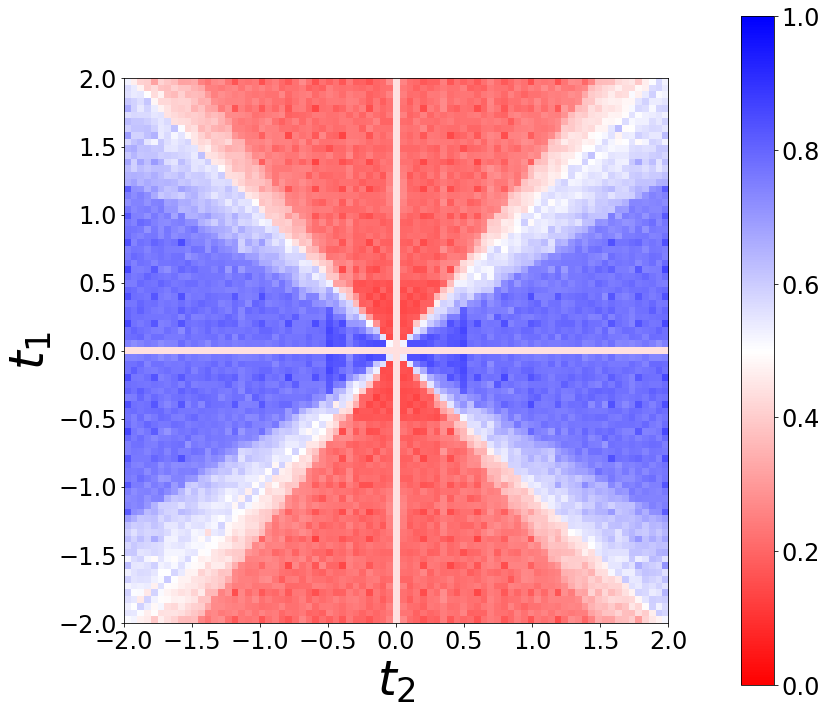

In [44]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_110_feat_111_3_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with random features

In [45]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_periodic_6561_110.csv"                   
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_110_random_feat"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443420 entries, 0 to 1443419
Columns: 228 entries, id to feat219
dtypes: float64(223), int32(3), object(2)
memory usage: 2.4+ GB
CPU times: user 40.3 s, sys: 2.84 s, total: 43.1 s
Wall time: 1min 2s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.067420,0.067420,...,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.095346,0.095307,...,0.091484,0.090680,0.092868,0.092214,0.093950,0.093447,0.094725,0.094376,0.095191,0.094997
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.095346,0.095191,...,0.080210,0.077137,0.085564,0.083022,0.089801,0.087826,0.092868,0.091484,0.094725,0.093950
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.067420,-0.067420,...,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.095346,-0.095307,...,0.091484,-0.090680,0.092868,-0.092214,0.093950,-0.093447,0.094725,-0.094376,0.095191,-0.094997


#### Running simulation

In [46]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = 2
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features, \
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)


running experiments:   0%|          | 0/100 [00:00<?, ?it/s]

random_features:  [38 77]



running experiments:   1%|          | 1/100 [00:08<14:33,  8.83s/it]

random_features:  [  6 162]



running experiments:   2%|▏         | 2/100 [00:15<13:25,  8.22s/it]

random_features:  [110 119]



running experiments:   3%|▎         | 3/100 [00:21<12:20,  7.64s/it]

random_features:  [ 42 181]



running experiments:   4%|▍         | 4/100 [00:28<11:43,  7.33s/it]

random_features:  [ 83 204]



running experiments:   5%|▌         | 5/100 [00:34<11:06,  7.01s/it]

random_features:  [163 217]



running experiments:   6%|▌         | 6/100 [00:41<10:46,  6.88s/it]

random_features:  [ 63 196]



running experiments:   7%|▋         | 7/100 [00:47<10:17,  6.64s/it]

random_features:  [ 93 122]



running experiments:   8%|▊         | 8/100 [00:53<09:54,  6.46s/it]

random_features:  [ 88 131]



running experiments:   9%|▉         | 9/100 [00:59<09:42,  6.40s/it]

random_features:  [168 214]



running experiments:  10%|█         | 10/100 [01:07<10:15,  6.84s/it]

random_features:  [181 183]



running experiments:  11%|█         | 11/100 [01:13<09:49,  6.63s/it]

random_features:  [155 108]



running experiments:  12%|█▏        | 12/100 [01:20<09:46,  6.67s/it]

random_features:  [111  79]



running experiments:  13%|█▎        | 13/100 [01:26<09:26,  6.51s/it]

random_features:  [156 107]



running experiments:  14%|█▍        | 14/100 [01:32<09:08,  6.38s/it]

random_features:  [55 84]



running experiments:  15%|█▌        | 15/100 [01:38<08:56,  6.31s/it]

random_features:  [138 163]



running experiments:  16%|█▌        | 16/100 [01:45<08:52,  6.34s/it]

random_features:  [198   4]



running experiments:  17%|█▋        | 17/100 [01:51<08:48,  6.36s/it]

random_features:  [39 89]



running experiments:  18%|█▊        | 18/100 [01:57<08:38,  6.32s/it]

random_features:  [  3 120]



running experiments:  19%|█▉        | 19/100 [02:03<08:24,  6.23s/it]

random_features:  [ 21 180]



running experiments:  20%|██        | 20/100 [02:09<08:14,  6.18s/it]

random_features:  [167 140]



running experiments:  21%|██        | 21/100 [02:16<08:14,  6.26s/it]

random_features:  [105 187]



running experiments:  22%|██▏       | 22/100 [02:22<08:07,  6.25s/it]

random_features:  [105  11]



running experiments:  23%|██▎       | 23/100 [02:28<07:57,  6.21s/it]

random_features:  [35  8]



running experiments:  24%|██▍       | 24/100 [02:35<07:55,  6.25s/it]

random_features:  [120 144]



running experiments:  25%|██▌       | 25/100 [02:41<07:53,  6.31s/it]

random_features:  [147 201]



running experiments:  26%|██▌       | 26/100 [02:48<08:04,  6.55s/it]

random_features:  [78 96]



running experiments:  27%|██▋       | 27/100 [02:56<08:22,  6.88s/it]

random_features:  [49 13]



running experiments:  28%|██▊       | 28/100 [03:02<08:00,  6.67s/it]

random_features:  [ 88 163]



running experiments:  29%|██▉       | 29/100 [03:08<07:47,  6.59s/it]

random_features:  [219  39]



running experiments:  30%|███       | 30/100 [03:15<07:41,  6.59s/it]

random_features:  [151 107]



running experiments:  31%|███       | 31/100 [03:21<07:32,  6.56s/it]

random_features:  [163  98]



running experiments:  32%|███▏      | 32/100 [03:28<07:16,  6.42s/it]

random_features:  [164 193]



running experiments:  33%|███▎      | 33/100 [03:34<07:03,  6.32s/it]

random_features:  [198 141]



running experiments:  34%|███▍      | 34/100 [03:40<06:53,  6.26s/it]

random_features:  [170 133]



running experiments:  35%|███▌      | 35/100 [03:46<06:49,  6.29s/it]

random_features:  [148   3]



running experiments:  36%|███▌      | 36/100 [03:52<06:37,  6.22s/it]

random_features:  [128  43]



running experiments:  37%|███▋      | 37/100 [03:59<06:39,  6.34s/it]

random_features:  [183 172]



running experiments:  38%|███▊      | 38/100 [04:05<06:32,  6.32s/it]

random_features:  [174  37]



running experiments:  39%|███▉      | 39/100 [04:11<06:27,  6.35s/it]

random_features:  [178 154]



running experiments:  40%|████      | 40/100 [04:18<06:17,  6.28s/it]

random_features:  [174  40]



running experiments:  41%|████      | 41/100 [04:24<06:13,  6.34s/it]

random_features:  [ 46 142]



running experiments:  42%|████▏     | 42/100 [04:32<06:28,  6.70s/it]

random_features:  [36  7]



running experiments:  43%|████▎     | 43/100 [04:38<06:11,  6.52s/it]

random_features:  [  5 183]



running experiments:  44%|████▍     | 44/100 [04:44<05:57,  6.38s/it]

random_features:  [130 215]



running experiments:  45%|████▌     | 45/100 [04:50<05:49,  6.35s/it]

random_features:  [22 91]



running experiments:  46%|████▌     | 46/100 [04:56<05:39,  6.29s/it]

random_features:  [ 7 89]



running experiments:  47%|████▋     | 47/100 [05:02<05:31,  6.25s/it]

random_features:  [26 83]



running experiments:  48%|████▊     | 48/100 [05:08<05:20,  6.17s/it]

random_features:  [160 153]



running experiments:  49%|████▉     | 49/100 [05:15<05:14,  6.17s/it]

random_features:  [25 98]



running experiments:  50%|█████     | 50/100 [05:21<05:13,  6.27s/it]

random_features:  [196  46]



running experiments:  51%|█████     | 51/100 [05:30<05:40,  6.95s/it]

random_features:  [171 185]



running experiments:  52%|█████▏    | 52/100 [05:36<05:24,  6.76s/it]

random_features:  [176 128]



running experiments:  53%|█████▎    | 53/100 [05:42<05:10,  6.60s/it]

random_features:  [ 93 169]



running experiments:  54%|█████▍    | 54/100 [05:48<04:58,  6.50s/it]

random_features:  [154 141]



running experiments:  55%|█████▌    | 55/100 [05:55<04:50,  6.46s/it]

random_features:  [142 189]



running experiments:  56%|█████▌    | 56/100 [06:01<04:38,  6.34s/it]

random_features:  [133 153]



running experiments:  57%|█████▋    | 57/100 [06:07<04:33,  6.37s/it]

random_features:  [158 207]



running experiments:  58%|█████▊    | 58/100 [06:15<04:44,  6.77s/it]

random_features:  [202 154]



running experiments:  59%|█████▉    | 59/100 [06:21<04:33,  6.66s/it]

random_features:  [111 116]



running experiments:  60%|██████    | 60/100 [06:27<04:19,  6.48s/it]

random_features:  [219   8]



running experiments:  61%|██████    | 61/100 [06:34<04:08,  6.37s/it]

random_features:  [44 15]



running experiments:  62%|██████▏   | 62/100 [06:40<04:02,  6.39s/it]

random_features:  [188  92]



running experiments:  63%|██████▎   | 63/100 [06:47<04:05,  6.63s/it]

random_features:  [ 49 157]



running experiments:  64%|██████▍   | 64/100 [06:53<03:52,  6.45s/it]

random_features:  [137   9]



running experiments:  65%|██████▌   | 65/100 [06:59<03:41,  6.32s/it]

random_features:  [173 175]



running experiments:  66%|██████▌   | 66/100 [07:05<03:33,  6.27s/it]

random_features:  [114 130]



running experiments:  67%|██████▋   | 67/100 [07:12<03:28,  6.32s/it]

random_features:  [205   2]



running experiments:  68%|██████▊   | 68/100 [07:18<03:19,  6.24s/it]

random_features:  [165 172]



running experiments:  69%|██████▉   | 69/100 [07:24<03:11,  6.19s/it]

random_features:  [ 75 111]



running experiments:  70%|███████   | 70/100 [07:30<03:03,  6.13s/it]

random_features:  [183 196]



running experiments:  71%|███████   | 71/100 [07:36<02:55,  6.06s/it]

random_features:  [25 24]



running experiments:  72%|███████▏  | 72/100 [07:42<02:49,  6.05s/it]

random_features:  [167 196]



running experiments:  73%|███████▎  | 73/100 [07:49<02:51,  6.34s/it]

random_features:  [112 114]



running experiments:  74%|███████▍  | 74/100 [07:56<02:49,  6.53s/it]

random_features:  [107 121]



running experiments:  75%|███████▌  | 75/100 [08:02<02:39,  6.38s/it]

random_features:  [37 79]



running experiments:  76%|███████▌  | 76/100 [08:08<02:30,  6.27s/it]

random_features:  [76 32]



running experiments:  77%|███████▋  | 77/100 [08:15<02:32,  6.64s/it]

random_features:  [ 36 168]



running experiments:  78%|███████▊  | 78/100 [08:22<02:29,  6.77s/it]

random_features:  [36  1]



running experiments:  79%|███████▉  | 79/100 [08:29<02:18,  6.58s/it]

random_features:  [82  0]



running experiments:  80%|████████  | 80/100 [08:35<02:10,  6.52s/it]

random_features:  [122 201]



running experiments:  81%|████████  | 81/100 [08:41<02:03,  6.49s/it]

random_features:  [ 66 118]



running experiments:  82%|████████▏ | 82/100 [08:48<01:56,  6.48s/it]

random_features:  [160  98]



running experiments:  83%|████████▎ | 83/100 [08:55<01:51,  6.54s/it]

random_features:  [ 23 116]



running experiments:  84%|████████▍ | 84/100 [09:01<01:42,  6.43s/it]

random_features:  [ 54 212]



running experiments:  85%|████████▌ | 85/100 [09:09<01:44,  6.96s/it]

random_features:  [120 189]



running experiments:  86%|████████▌ | 86/100 [09:15<01:35,  6.80s/it]

random_features:  [82 84]



running experiments:  87%|████████▋ | 87/100 [09:23<01:30,  6.97s/it]

random_features:  [10 54]



running experiments:  88%|████████▊ | 88/100 [09:29<01:21,  6.82s/it]

random_features:  [ 6 43]



running experiments:  89%|████████▉ | 89/100 [09:35<01:12,  6.60s/it]

random_features:  [ 23 121]



running experiments:  90%|█████████ | 90/100 [09:42<01:05,  6.54s/it]

random_features:  [ 50 214]



running experiments:  91%|█████████ | 91/100 [09:48<00:59,  6.58s/it]

random_features:  [123  51]



running experiments:  92%|█████████▏| 92/100 [09:55<00:52,  6.51s/it]

random_features:  [ 84 210]



running experiments:  93%|█████████▎| 93/100 [10:01<00:45,  6.52s/it]

random_features:  [ 36 213]



running experiments:  94%|█████████▍| 94/100 [10:07<00:38,  6.42s/it]

random_features:  [36 72]



running experiments:  95%|█████████▌| 95/100 [10:15<00:34,  6.85s/it]

random_features:  [215 115]



running experiments:  96%|█████████▌| 96/100 [10:22<00:26,  6.70s/it]

random_features:  [128 196]



running experiments:  97%|█████████▋| 97/100 [10:28<00:20,  6.74s/it]

random_features:  [169  36]



running experiments:  98%|█████████▊| 98/100 [10:35<00:13,  6.54s/it]

random_features:  [152 164]



running experiments:  99%|█████████▉| 99/100 [10:42<00:06,  6.68s/it]

random_features:  [83 29]



running experiments: 100%|██████████| 100/100 [10:48<00:00,  6.55s/it]

,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.067420,0.067420,...,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420,0.067420
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.095346,0.095307,...,0.091484,0.090680,0.092868,0.092214,0.093950,0.093447,0.094725,0.094376,0.095191,0.094997
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.095346,0.095191,...,0.080210,0.077137,0.085564,0.083022,0.089801,0.087826,0.092868,0.091484,0.094725,0.093950
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.067420,-0.067420,...,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420,0.067420,-0.067420
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.095346,-0.095307,...,0.091484,-0.090680,0.092868,-0.092214,0.093950,-0.093447,0.094725,-0.094376,0.095191,-0.094997
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.095346,-0.095191,...,0.080210,-0.077137,0.085564,-0.083022,0.089801,-0.087826,0.092868,-0.091484,0.094725,-0.093950
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.095346,0.085564,...,0.013569,0.029464,0.083022,-0.053818,0.087826,-0.095191,0.024239,-0.062439,-0.058223,0.018935
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.000142,-0.002581,...,0.026726,-0.029329,0.021458,-0.024102,0.016119,-0.018796,0.010728,-0.013429,0.005302,-0.008018
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.000068,-0.005375,...,0.051491,-0.055988,0.042008,-0.046825,0.031977,-0.037053,0.021529,-0.026797,0.010801,-0.016191
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,-0.095346,0.094725,...,-0.039608,0.029463,-0.058223,0.049236,-0.073811,0.066450,-0.085563,0.080210,-0.092868,0.089801


#### Loading simulation with random features

In [47]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_periodic_6561_110_random_feat"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Computing Hamiltonian summary for simulation with random features

In [48]:
simulation.compute_hamiltonian_summary()


majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 111767.47it/s]

#### Computing mean accuracies for simulation with random features

In [49]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy


computing mean accuracies: 100%|██████████| 100/100 [00:46<00:00,  1.98it/s]

{'eigenvector_train': 0.9566263552960801,
 'eigenvector_val': 0.661099165971643,
 'eigenvector_test': 0.5626534928229665,
 'hamiltonian_train': 0.9881284403669727,
 'hamiltonian_val': 0.8927400611620796,
 'hamiltonian_test': 0.7082947368421054}

#### Plotting heatmap for simulation with random features

Skipping winding 0
Plotting winding 1


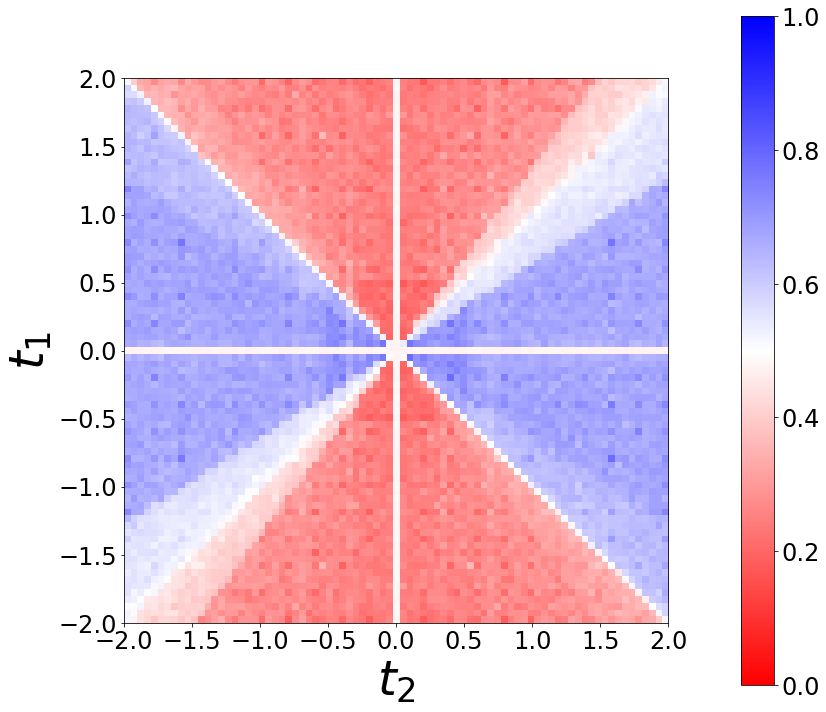

In [50]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_periodic_6561_110_random_feat_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)